In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
import os
data_folder = "../data"

### Read Macro-data for Mexico

In [3]:
macro_p = os.path.join(data_folder, 'macro_data.csv')
dm = pd.read_csv(macro_p, parse_dates=['date'], index_col=['date'])

In [4]:
dm.tail()

,mxn_usd_spot,mxn_fwd_1m,min_max_spread,bid_ask_spread,mxn_interbank_1m,mxn_sov_10y,usa_libor_1m,usa_sov_10y,vix,oil_prices,eur_usd_spot
date,,,,,,,,,,,
2020-10-08,21.3981,748.00,0.1978,0.0482,4.5425,6.162,0.14688,0.7852,26.36,41.19,1.1759
2020-10-09,21.1387,790.50,0.3052,0.0812,4.5390,6.076,0.14525,0.7737,25.00,40.60,1.1826
2020-10-12,21.2033,808.00,0.1764,0.0308,4.5345,6.043,0.14425,0.7737,25.07,39.43,1.1813
2020-10-13,21.3447,792.99,0.3209,0.0423,4.5370,6.073,0.14838,0.7272,26.07,40.20,1.1745
2020-10-14,21.3361,770.00,0.2018,0.0059,4.5357,6.062,0.14838,0.7206,26.57,41.00,1.1749


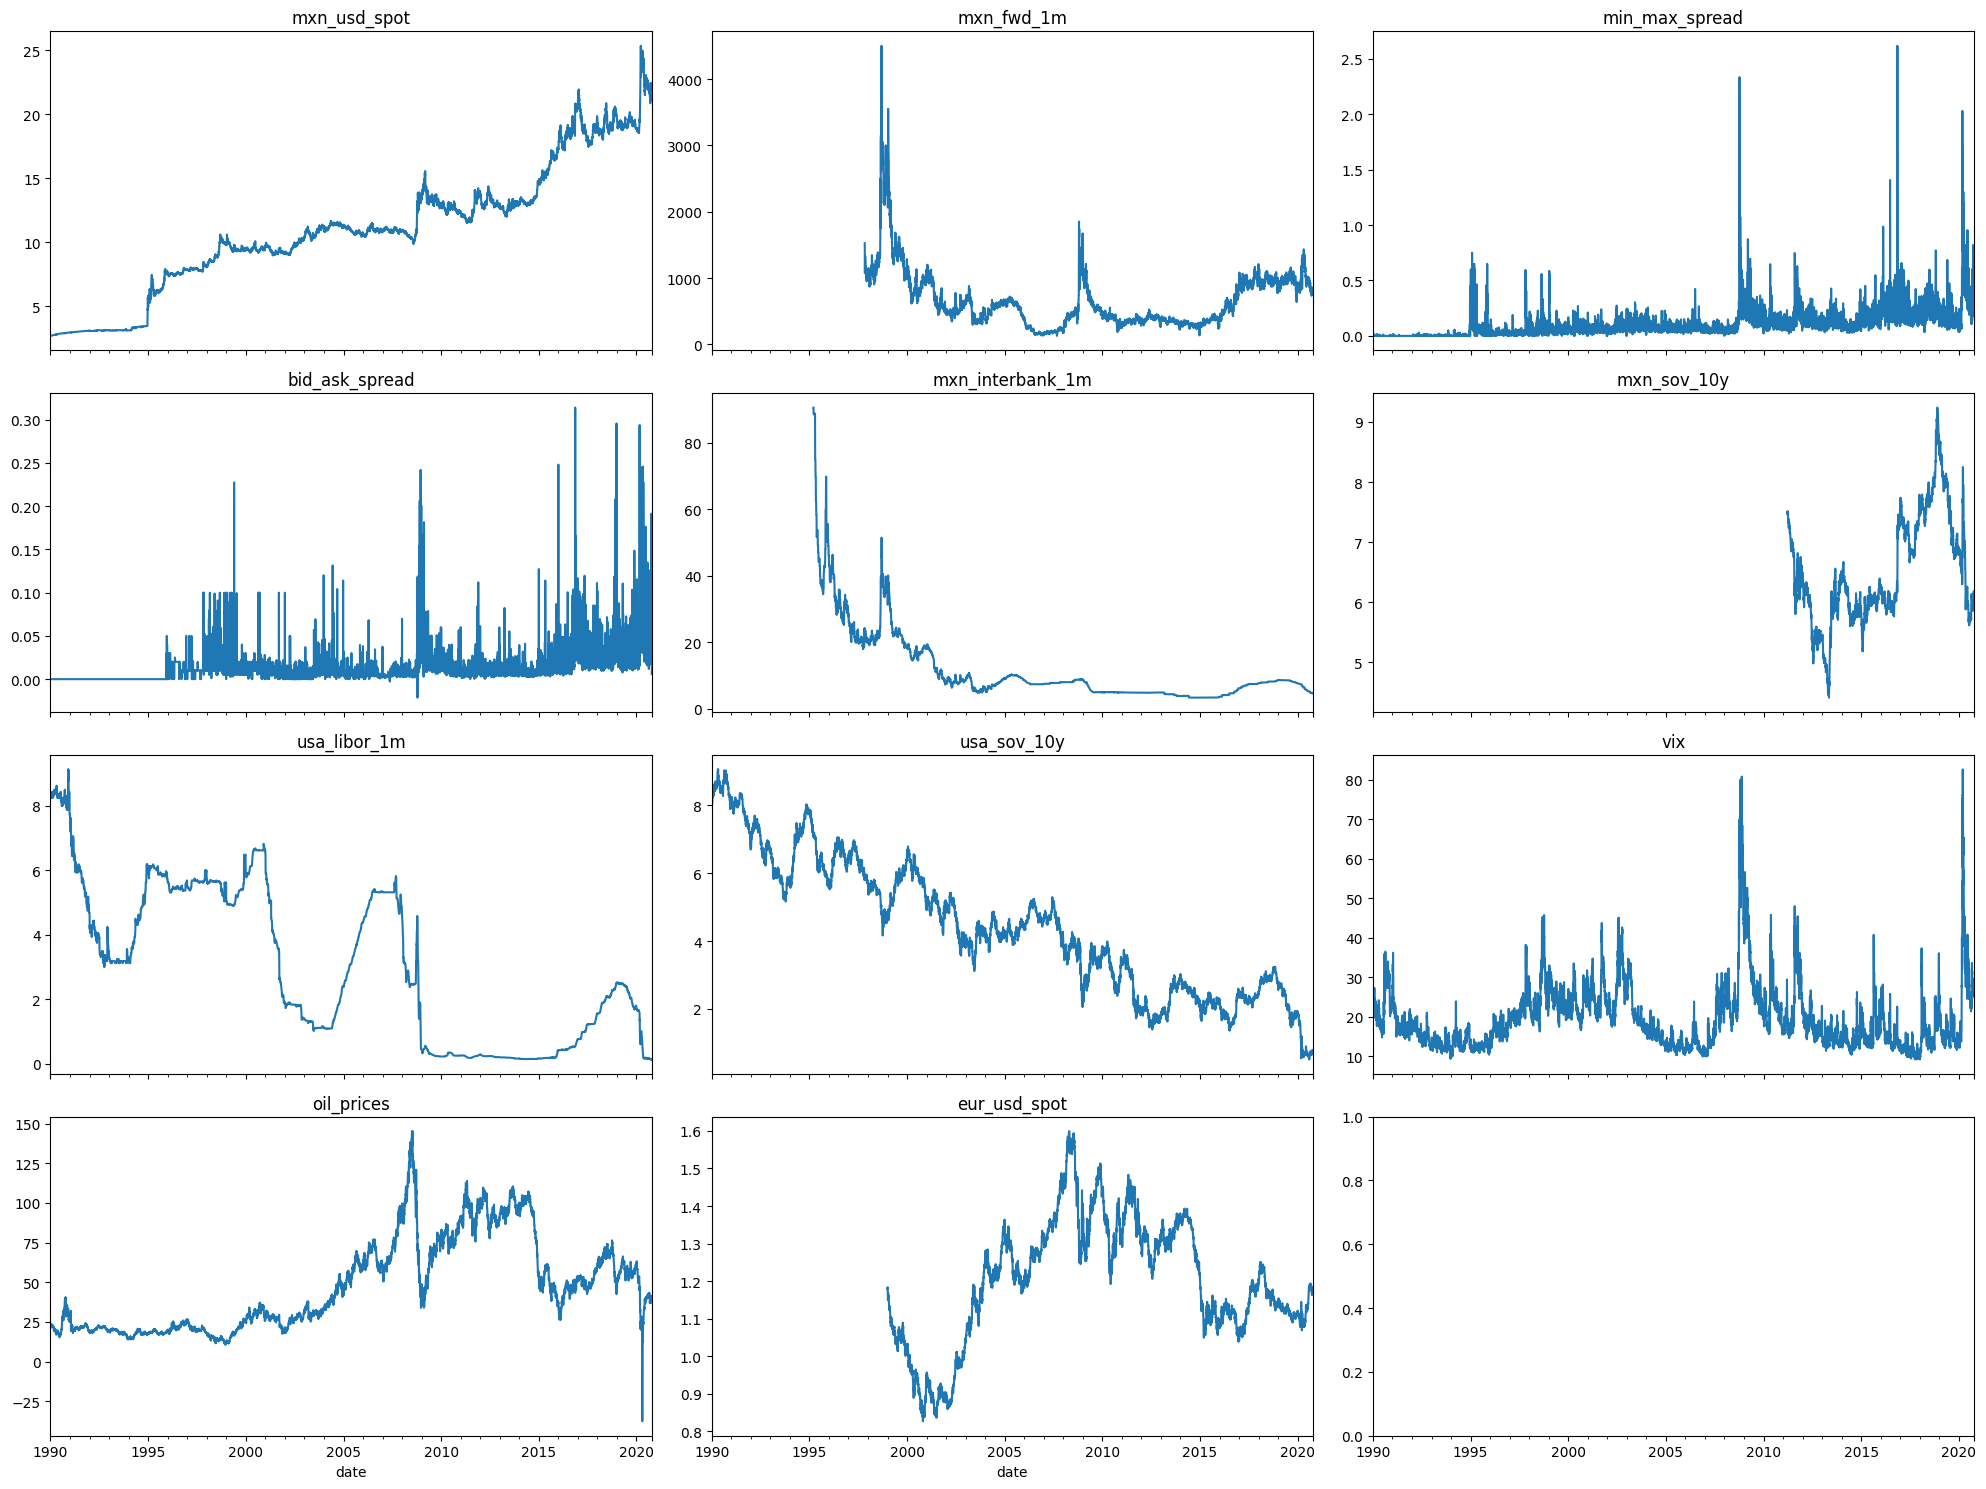

In [5]:
def plot_columns(dm, columns=[]):
    cols_to_plot = dm.columns if (len(columns)==0) else columns
    
    ncols = 3
    nrows = int(np.ceil(len(cols_to_plot)/ncols))
    i=1
    f, axes = plt.subplots(nrows, ncols, figsize=(5*nrows, 5*ncols), sharex=True)
    
    for c in cols_to_plot:
        ax = plt.subplot(nrows, ncols, i)
        dm[c].plot(ax= ax, title =c)
        i+=1;    
    plt.tight_layout()
    plt.show()    
    
plot_columns(dm)    

### Read FX Intervention data for Mexico

In [6]:
inter_p = os.path.join(data_folder, 'intervention_data.csv')
di = pd.read_csv(inter_p, parse_dates=['date'], index_col=['date'])
di.reset_index(inplace=True)

In [7]:
di.head()

,date,amount,direction,type,sell_amount
0,2008-10-09,0,sell USD,min price,NaN
1,2008-10-10,400,sell USD,min price,400.0
2,2008-10-13,0,sell USD,min price,NaN
3,2008-10-14,0,sell USD,min price,NaN
4,2008-10-15,400,sell USD,min price,400.0


In [8]:
print('only sell interventions one direction')
di.direction.value_counts()

only sell interventions one direction


sell USD    1330
Name: direction, dtype: int64

In [9]:
di['type'].value_counts()

min price       1011
no min price     319
Name: type, dtype: int64

In [10]:
di.dropna()['type'].value_counts()

no min price    319
min price        62
Name: type, dtype: int64

In [11]:
di.groupby('type').sell_amount.describe()

,count,mean,std,min,25%,50%,75%,max
type,,,,,,,,
min price,62.0,235.645161,107.615298,6.0,200.0,200.0,298.0,400.0
no min price,319.0,96.840125,61.837097,30.0,50.0,52.0,100.0,259.0


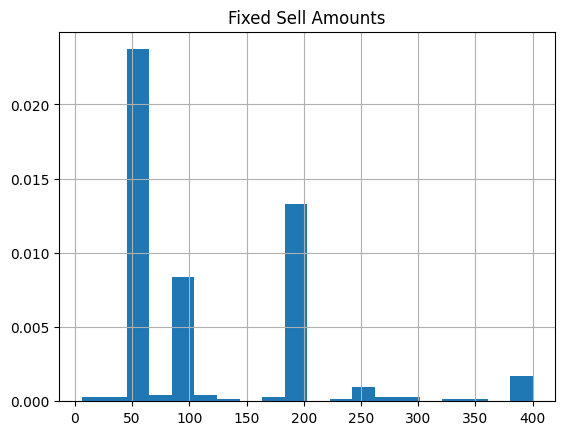

In [12]:
di['sell_amount'].dropna().hist(bins=20, density =True)
plt.title('Fixed Sell Amounts')
plt.show()

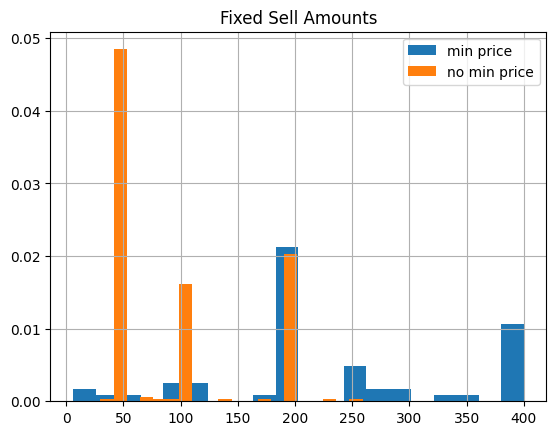

In [13]:
di.loc[di['type']=='min price', 'sell_amount'].dropna().hist(bins=20, density=True)
di.loc[di['type']=='no min price', 'sell_amount'].dropna().hist(bins=20, density=True)
plt.legend(['min price', 'no min price'])
plt.title('Fixed Sell Amounts')
plt.show()

In [14]:
tmp = di.groupby('date').size()
duplicate_dates = di.loc[di.date.isin(tmp[tmp>1].index)]
print(duplicate_dates.groupby('date').sell_amount.count().value_counts())
duplicate_dates

1    300
2     19
Name: sell_amount, dtype: int64


,date,amount,direction,type,sell_amount
102,2009-03-09,100,sell USD,no min price,100.0
103,2009-03-09,0,sell USD,min price,NaN
104,2009-03-10,0,sell USD,min price,NaN
105,2009-03-10,100,sell USD,no min price,100.0
106,2009-03-11,0,sell USD,min price,NaN
...,...,...,...,...,...
1265,2015-11-18,0,sell USD,min price,NaN
1266,2015-11-19,0,sell USD,min price,NaN
1267,2015-11-19,200,sell USD,no min price,200.0
1268,2015-11-20,200,sell USD,no min price,200.0


In [15]:
intervenstions = di.set_index(['date', 'type']).sell_amount.unstack().fillna(0).reset_index()

### Merge Macro data with interventions data

In [16]:
df = pd.merge(dm.reset_index(), intervenstions, how='left', on='date')
df.set_index('date', inplace=True)

In [17]:
print(df.shape)
print(dm.shape)
df.tail()

(8033, 13)
(8033, 11)


,mxn_usd_spot,mxn_fwd_1m,min_max_spread,bid_ask_spread,mxn_interbank_1m,mxn_sov_10y,usa_libor_1m,usa_sov_10y,vix,oil_prices,eur_usd_spot,min price,no min price
date,,,,,,,,,,,,,
2020-10-08,21.3981,748.00,0.1978,0.0482,4.5425,6.162,0.14688,0.7852,26.36,41.19,1.1759,NaN,NaN
2020-10-09,21.1387,790.50,0.3052,0.0812,4.5390,6.076,0.14525,0.7737,25.00,40.60,1.1826,NaN,NaN
2020-10-12,21.2033,808.00,0.1764,0.0308,4.5345,6.043,0.14425,0.7737,25.07,39.43,1.1813,NaN,NaN
2020-10-13,21.3447,792.99,0.3209,0.0423,4.5370,6.073,0.14838,0.7272,26.07,40.20,1.1745,NaN,NaN
2020-10-14,21.3361,770.00,0.2018,0.0059,4.5357,6.062,0.14838,0.7206,26.57,41.00,1.1749,NaN,NaN


In [18]:
# New macro variables
def logret(series):
    return(np.log(series/series.shift(1)))

df['FX level'] = df['mxn_usd_spot'].copy()
df['FX log returns'] = 1e4*logret(df['mxn_usd_spot'])
df['Bid ask abs'] = np.abs(df['bid_ask_spread'])
df['Min max abs'] = np.abs(df['min_max_spread'])
df['Forward points first difference'] = df['mxn_fwd_1m'].diff(1)/1e2
df['Interbank rate vs Libor'] = (df['mxn_interbank_1m'] - df['usa_libor_1m']).diff(1)
df['VIX first diff'] = df['vix'].diff(1)
df['EURUSD log returns'] = 1e4*logret(df['eur_usd_spot'])
df['Oil prices log returns'] = 1e4*logret(df['oil_prices'])

/home/ubuntu/Documents/Projects/varfxi/.venv/lib/python3.9/site-packages/pandas/core/arraylike.py:402: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


In [165]:
# FX intervention variables
df['Intercept'] = 1
df['FX intervention in USD'] = (df['min price'] + df['no min price']).fillna(0)
df['fx_intervention_minprice'] = df['min price'].fillna(0)
df['fx_intervention_nominprice'] = df['no min price'].fillna(0)
df['FX intervention dummy'] = 0
df.loc[df['FX intervention in USD'] > 0, 'FX intervention dummy'] = 1
df['FX intervention dummy lag'] = df['FX intervention dummy'].shift(1)
df['FX log returns_fwd'] = df['FX log returns'].shift(-1)
df['FX/Vix'] = df['FX log returns'] / df['vix']

In [434]:
# Prepare the list of variables
microstructure = [
    'Bid ask abs', 
    'Min max abs',
    'Forward points first difference']

cip = ['Interbank rate vs Libor']

eurusd = ['EURUSD log returns']

external_shocks = ['VIX first diff', 'Oil prices log returns']

prev_interventions = ['FX intervention dummy lag']


# List of models
models_l = {'Microstructure': microstructure,
            'CIP': microstructure + cip,
            'Dollar move' : microstructure + cip + eurusd,
            'Risk Appetite': microstructure + cip + eurusd + external_shocks,
            'Baseline' : microstructure + cip + eurusd + external_shocks + prev_interventions
            }

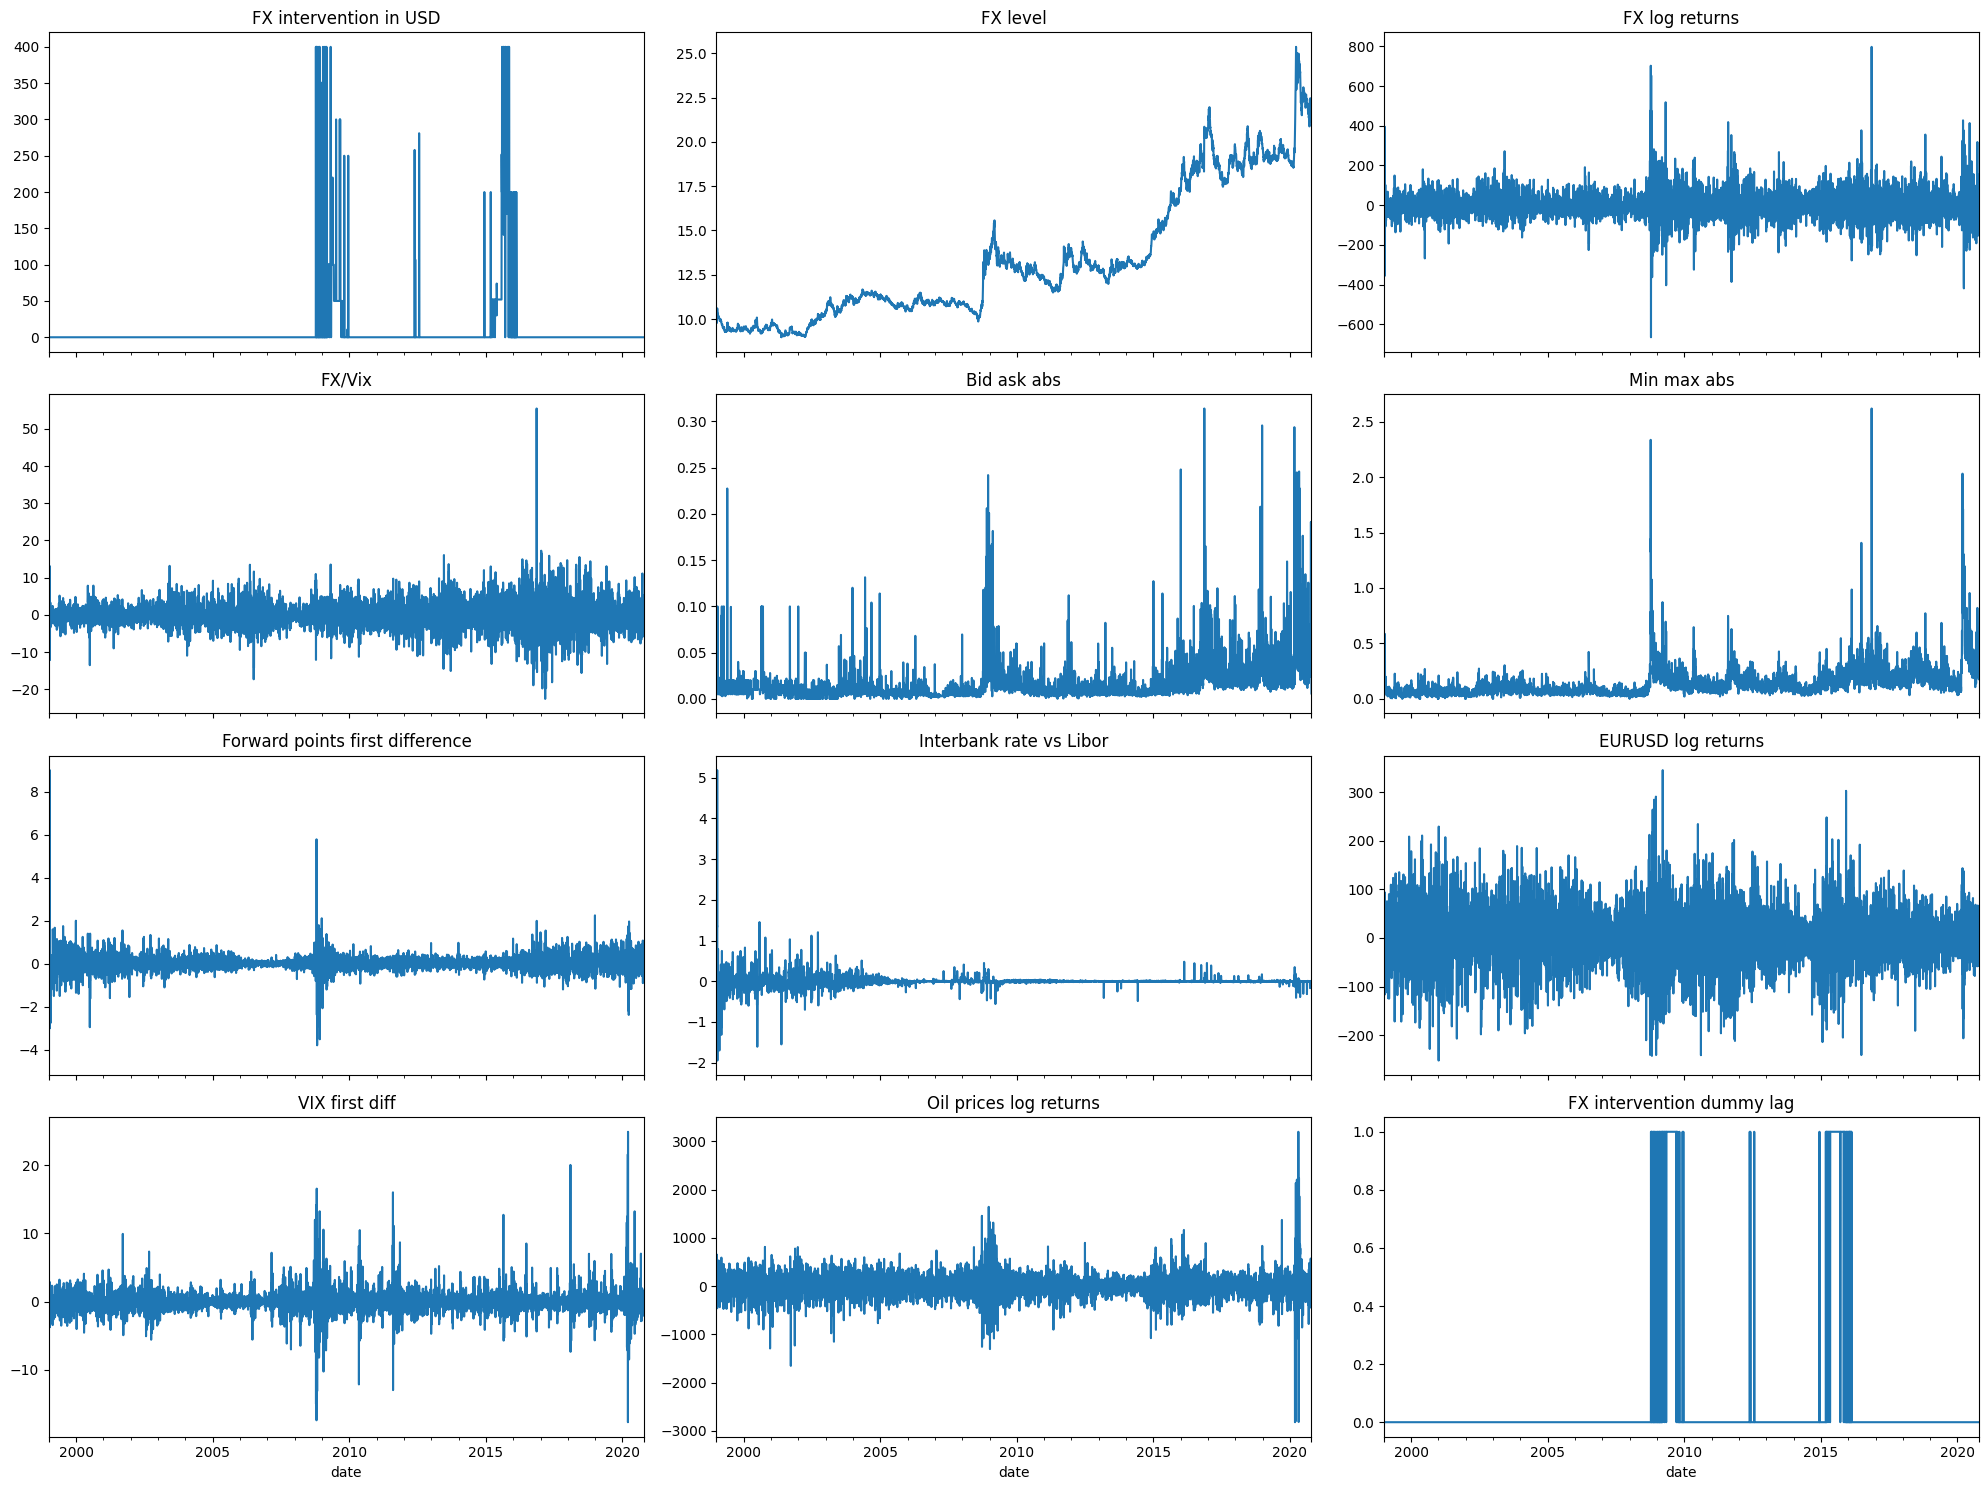

In [166]:
fx_cols = ['FX intervention in USD', 'FX level', 'FX log returns', 'FX/Vix']
transformed_variables = fx_cols + models_l['Baseline']

start_date = df.index[df[transformed_variables].count(axis=1) ==len(transformed_variables)][0]

df_tranformed = df.loc[df.index>=start_date, transformed_variables].fillna(0)
plot_columns(df_tranformed, transformed_variables)

In [521]:
!ls ../data

,date,mxn_usd_spot,mxn_fwd_1m,min_max_spread,bid_ask_spread,mxn_interbank_1m,mxn_sov_10y,usa_libor_1m,usa_sov_10y,vix,...,Intercept,FX log returns,Bid ask abs,Min max abs,Forward points first difference,Interbank rate vs Libor,VIX first diff,EURUSD log returns,Oil prices log returns,FX log returns_fwd
0,1990-01-01,2.6835,NaN,0.0000,0.0000,NaN,NaN,8.37500,7.9350,NaN,...,1,NaN,0.0000,0.0000,NaN,NaN,NaN,NaN,NaN,-24.251481
1,1990-01-02,2.6770,NaN,0.0070,0.0000,NaN,NaN,8.37500,7.9300,17.24,...,1,-24.251481,0.0000,0.0070,NaN,NaN,NaN,NaN,478.731536,0.000000
2,1990-01-03,2.6770,NaN,0.0000,0.0000,NaN,NaN,8.37500,7.9740,18.19,...,1,0.000000,0.0000,0.0000,NaN,NaN,0.95,NaN,339.306761,0.000000
3,1990-01-04,2.6770,NaN,0.0000,0.0000,NaN,NaN,8.31250,7.9720,19.22,...,1,0.000000,0.0000,0.0000,NaN,NaN,1.03,NaN,-114.675285,0.000000
4,1990-01-05,2.6770,NaN,0.0000,0.0000,NaN,NaN,8.37500,7.9840,20.11,...,1,0.000000,0.0000,0.0000,NaN,NaN,0.89,NaN,-141.968399,18.660203
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8028,2020-10-08,21.3981,748.00,0.1978,0.0482,4.5425,6.162,0.14688,0.7852,26.36,...,1,-68.602036,0.0482,0.1978,-0.1997,0.00012,-1.70,-3.401071,305.668362,-121.966493
8029,2020-10-09,21.1387,790.50,0.3052,0.0812,4.5390,6.076,0.14525,0.7737,25.00,...,1,-121.966493,0.0812,0.3052,0.4250,-0.00187,-1.36,56.815926,-144.274418,30.513462
8030,2020-10-12,21.2033,808.00,0.1764,0.0308,4.5345,6.043,0.14425,0.7737,25.07,...,1,30.513462,0.0308,0.1764,0.1750,-0.00350,0.07,-10.998774,-292.411187,66.466354
8031,2020-10-13,21.3447,792.99,0.3209,0.0423,4.5370,6.073,0.14838,0.7272,26.07,...,1,66.466354,0.0423,0.3209,-0.1501,-0.00163,1.00,-57.730019,193.400477,-4.029915


In [522]:
tmp = pd.read_csv('../data/clean_data.csv')

In [519]:
df_tranformed.to_csv('../data/cleaned_data.csv')

,FX intervention in USD,FX level,FX log returns,FX/Vix,Bid ask abs,Min max abs,Forward points first difference,Interbank rate vs Libor,EURUSD log returns,VIX first diff,Oil prices log returns,FX intervention dummy lag
date,,,,,,,,,,,,
1999-01-04,0.0,9.8825,-22.741640,-0.868997,0.0950,0.0700,-4.5000,-0.48625,31.306875,1.75,237.813585,0.0
1999-01-05,0.0,9.7950,-88.934648,-3.635922,0.0100,0.1290,-0.6250,-1.06360,-64.412461,-1.71,-287.730494,0.0
1999-01-06,0.0,9.7675,-28.115034,-1.204586,0.0050,0.0620,-1.2500,-1.41109,-113.729902,-1.12,653.722019,0.0
1999-01-07,0.0,9.8550,89.183927,3.659578,0.0050,0.1110,0.0000,0.76000,71.979745,1.03,224.034090,0.0
1999-01-08,0.0,9.8250,-30.487828,-1.309615,0.0100,0.0625,0.0000,0.15000,-109.027993,-1.09,-15.290523,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...
2020-10-08,0.0,21.3981,-68.602036,-2.602505,0.0482,0.1978,-0.1997,0.00012,-3.401071,-1.70,305.668362,0.0
2020-10-09,0.0,21.1387,-121.966493,-4.878660,0.0812,0.3052,0.4250,-0.00187,56.815926,-1.36,-144.274418,0.0
2020-10-12,0.0,21.2033,30.513462,1.217131,0.0308,0.1764,0.1750,-0.00350,-10.998774,0.07,-292.411187,0.0


In [405]:
from arch.univariate import ARX # Drift model
from arch.univariate import ConstantVariance, FixedVariance, GARCH, EGARCH, EWMAVariance, RiskMetrics2006 # Volatility models
from arch.univariate import Normal, StudentsT, SkewStudent # Distributions
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

In [174]:
def plot_series(data:pd.DataFrame, col:str):
    timeseries = data[col].dropna()
    series = {
        col: timeseries,
        col+'_squared': timeseries**2}

    for name, y in series.items():
        f, axes = plt.subplots(1,3, figsize=(15,5))
        y.plot(ax= axes[0], title=f'TimeSeries')
        acf_plot = plot_acf(y, lags=20, ax= axes[1])
        pacf_plot = plot_pacf(y.dropna(), lags=20, ax=axes[2])
        plt.suptitle(name)

    plt.tight_layout()
    plt.show()

/home/ubuntu/Documents/Projects/varfxi/.venv/lib/python3.9/site-packages/statsmodels/graphics/tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(
/home/ubuntu/Documents/Projects/varfxi/.venv/lib/python3.9/site-packages/statsmodels/graphics/tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


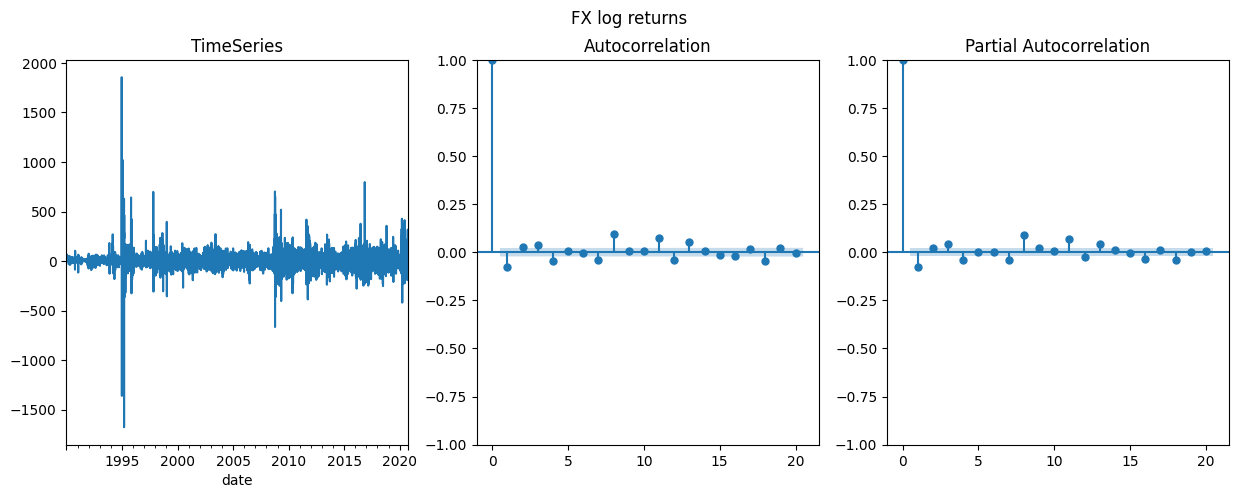

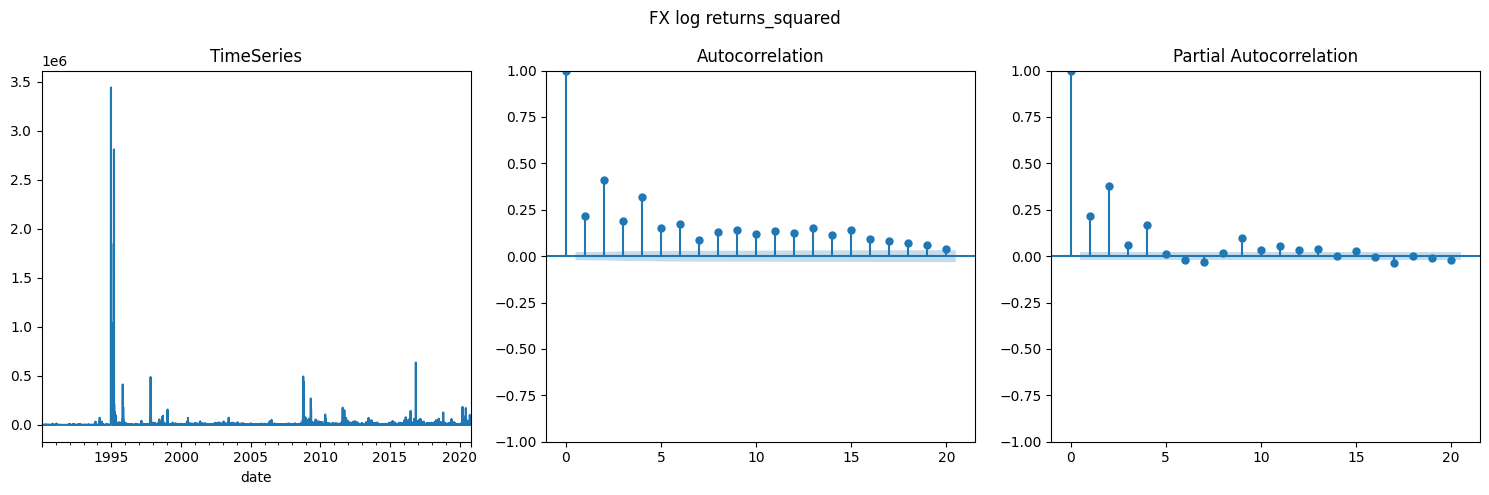

In [175]:
plot_series(df, 'FX log returns')    

/home/ubuntu/Documents/Projects/varfxi/.venv/lib/python3.9/site-packages/statsmodels/graphics/tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(
/home/ubuntu/Documents/Projects/varfxi/.venv/lib/python3.9/site-packages/statsmodels/graphics/tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


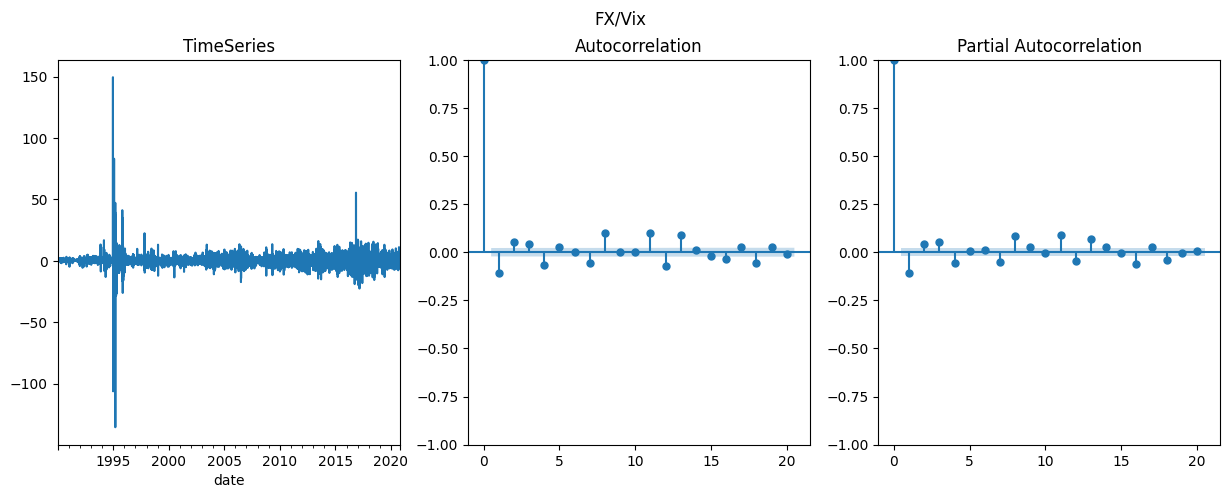

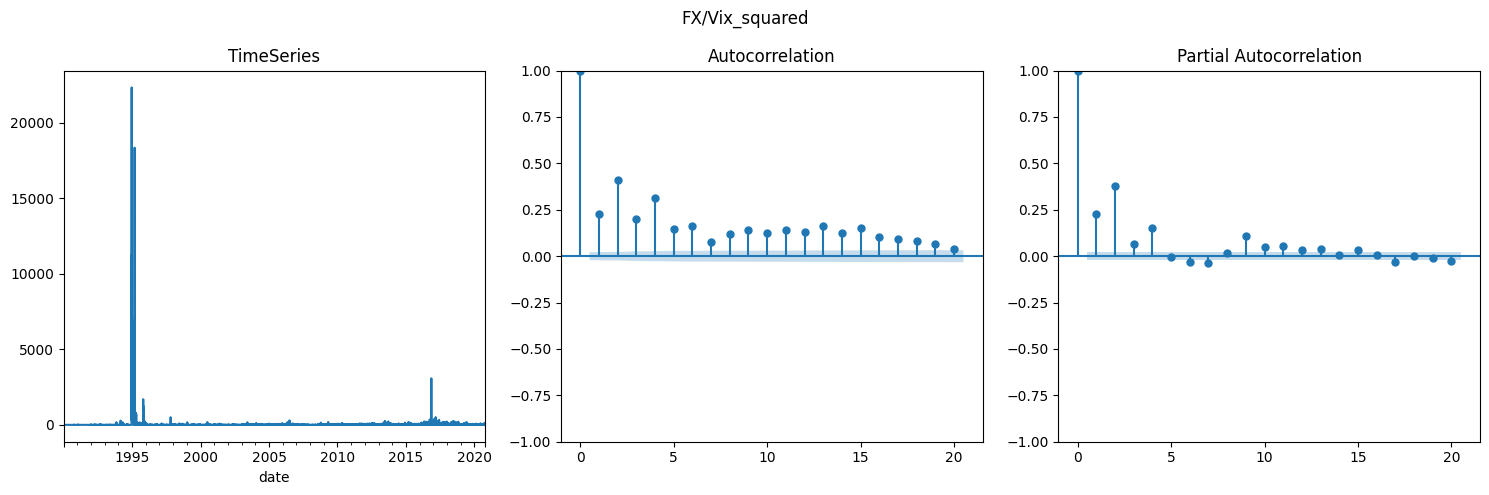

In [176]:
plot_series(df, 'FX/Vix')    

/home/ubuntu/Documents/Projects/varfxi/.venv/lib/python3.9/site-packages/statsmodels/graphics/tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


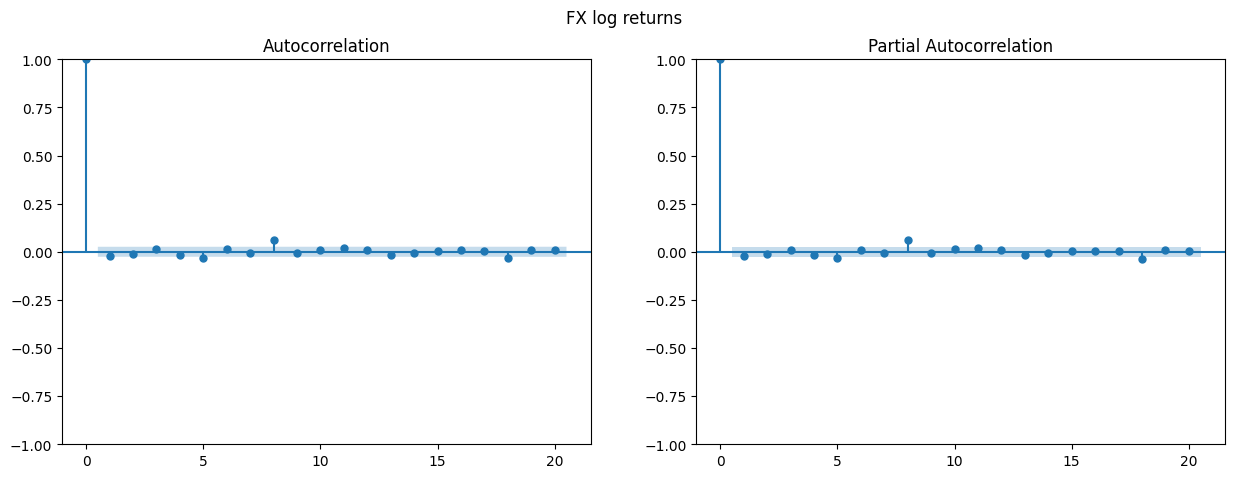

In [52]:
f, axes = plt.subplots(1,2, figsize=(15,5))
acf_plot = plot_acf(df_tranformed['FX log returns'], lags=20, ax= axes[0])
pacf_plot = plot_pacf(df_tranformed['FX log returns'], lags=20, ax=axes[1])
plt.suptitle('FX log returns')
plt.show()

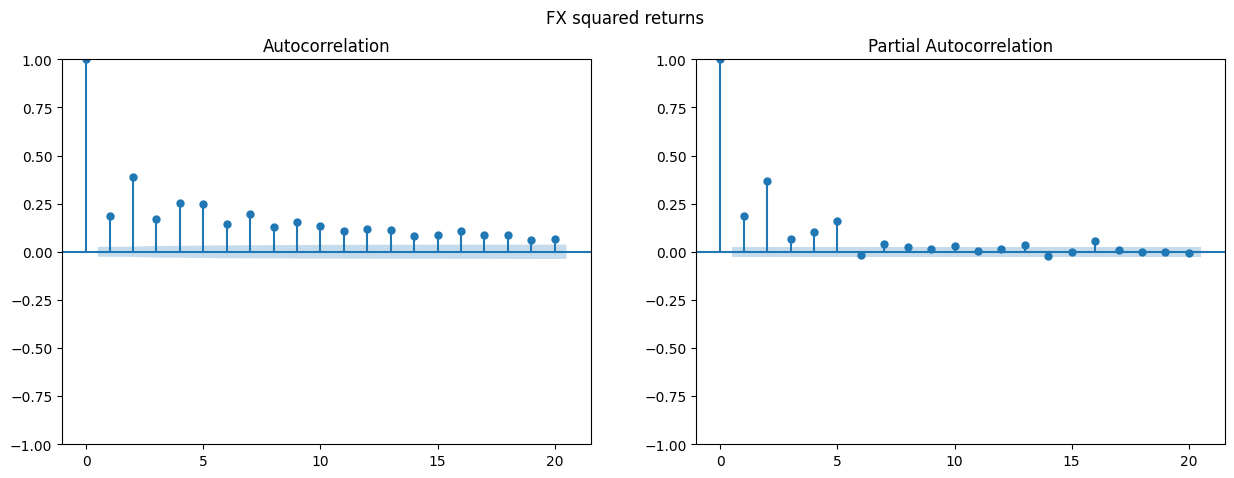

In [54]:
f, axes = plt.subplots(1,2, figsize=(15,5))
acf_plot = plot_acf(df_tranformed['FX log returns']**2, lags=20, ax= axes[0])
pacf_plot = plot_pacf(df_tranformed['FX log returns']**2, lags=20, ax=axes[1])
plt.suptitle('FX squared returns')
plt.show()

In [335]:
models_l['Baseline']

['Min max abs',
 'Forward points first difference',
 'Interbank rate vs Libor',
 'EURUSD log returns',
 'VIX first diff',
 'Oil prices log returns',
 'FX intervention dummy lag']

In [381]:
import statsmodels.api as sm
exog_l =[
 'Bid ask abs',
 'Min max abs',
 'Forward points first difference',
 'Interbank rate vs Libor',
 'VIX first diff',
 'EURUSD log returns',
 'Oil prices log returns',
 'FX intervention dummy lag'
]
y = df_tranformed['FX/Vix'] #'FX log returns'
X = sm.add_constant(df_tranformed[exog_l])

# Fit the model using OLS
model = sm.OLS(y, X).fit()

# Print the model summary
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                 FX/Vix   R-squared:                       0.159
Model:                            OLS   Adj. R-squared:                  0.157
Method:                 Least Squares   F-statistic:                     133.6
Date:                Thu, 06 Apr 2023   Prob (F-statistic):          3.62e-206
Time:                        10:48:36   Log-Likelihood:                -15075.
No. Observations:                5683   AIC:                         3.017e+04
Df Residuals:                    5674   BIC:                         3.023e+04
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                                      coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------------
const     

### Zig-Zag Method
Split Mean estimation from volatility estimation

iteration_0         iteration_1          \
                                     params pvalues      params pvalues   
Const                                -0.232   0.136      -0.164   0.014   
FX/Vix[1]                            -0.054   0.023      -0.064   0.000   
FX/Vix[8]                             0.032   0.068       0.030   0.015   
Bid ask abs                          -2.063   0.647       0.103   0.967   
Min max abs                           1.915   0.249       1.416   0.063   
Forward points first difference       1.332   0.000       0.977   0.000   
Interbank rate vs Libor               1.301   0.001       1.318   0.000   
EURUSD log returns                   -0.011   0.000      -0.007   0.000   
VIX first diff                        0.535   0.000       0.550   0.000   
Oil prices log returns               -0.001   0.000      -0.001   0.000   
FX intervention dummy lag             0.060   0.784       0.051   0.775   
sigma2                               11.729   0.000         NaN     NaN   
omega                                 0.045   0.007       0.040   0.009   
alpha[1]                              0.073   0.000       0.076   0.000   
gamma[1]                             -0.028   0.010      -0.031   0.004   
beta[1]                               0.939   0.000       0.938   0.000   
eta                                   9.178   0.000       9.260   0.000   
lambda                                0.015   0.400       0.032   0.079   

                                iteration_2          
                                     params pvalues  
Const                                -0.167   0.010  
FX/Vix[1]                            -0.065   0.000  
FX/Vix[8]                             0.030   0.015  
Bid ask abs                           0.409   0.866  
Min max abs                           1.486   0.049  
Forward points first difference       0.917   0.000  
Interbank rate vs Libor               1.354   0.000  
EURUSD log returns                   -0.006   0.000  
VIX first diff                        0.535   0.000  
Oil prices log returns               -0.001   0.000  
FX intervention dummy lag             0.013   0.944  
sigma2                                  NaN     NaN  
omega                                 0.038   0.011  
alpha[1]                              0.077   0.000  
gamma[1]                             -0.032   0.004  
beta[1]                               0.938   0.000  
eta                                   9.300   0.000  
lambda                                0.031   0.091

                    AR-X - Fixed Variance (Unit Scale) Model Results                   
Dep. Variable:                          FX/Vix   R-squared:                       0.153
Mean Model:                               AR-X   Adj. R-squared:                  0.151
Vol Model:         Fixed Variance (Unit Scale)   Log-Likelihood:               -14107.0
Distribution:                           Normal   AIC:                           28236.1
Method:                     Maximum Likelihood   BIC:                           28309.2
                                                 No. Observations:                 5675
Date:                         Thu, Apr 06 2023   Df Residuals:                     5664
Time:                                 14:18:57   Df Model:                           11
                                             Mean Model                                             
                                       coef    std err          t      P>|t|        95.0% Conf. Int.
------

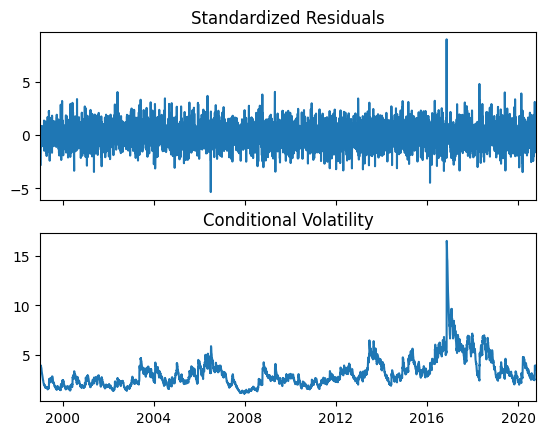

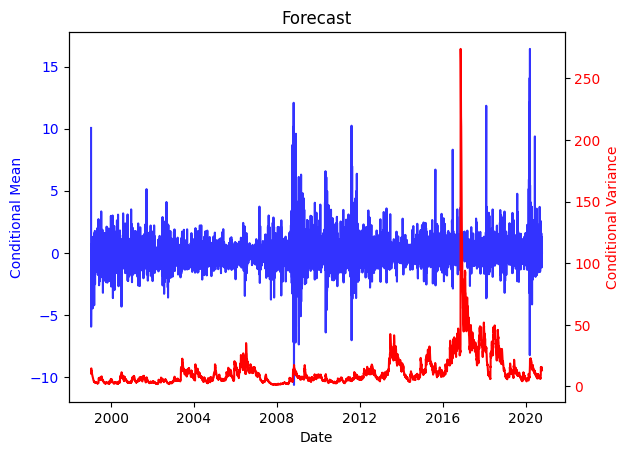

iteration_0         iteration_1          \
                                     params pvalues      params pvalues   
Const                                -5.655   0.035      -6.514   0.000   
FX l...rns[1]                        -0.048   0.044      -0.070   0.000   
FX l...rns[8]                         0.038   0.029       0.031   0.009   
Bid ask abs                          32.118   0.692     -49.194   0.311   
Min max abs                          50.203   0.075      79.454   0.000   
Forward points first difference      29.804   0.000      23.228   0.000   
Interbank rate vs Libor              30.354   0.001      30.304   0.000   
EURUSD log returns                   -0.220   0.000      -0.171   0.000   
VIX first diff                       15.934   0.000      15.461   0.000   
Oil prices log returns               -0.021   0.000      -0.023   0.000   
FX intervention dummy lag            -6.008   0.177      -1.139   0.756   
sigma2                             3718.237   0.000         NaN     NaN   
omega                                28.127   0.004      27.174   0.006   
alpha[1]                              0.096   0.000       0.107   0.000   
gamma[1]                             -0.057   0.000      -0.065   0.000   
beta[1]                               0.925   0.000       0.922   0.000   
eta                                   8.769   0.000       8.685   0.000   
lambda                                0.031   0.100       0.005   0.799   

                                iteration_2          
                                     params pvalues  
Const                                -6.402   0.000  
FX l...rns[1]                        -0.069   0.000  
FX l...rns[8]                         0.031   0.010  
Bid ask abs                         -46.334   0.332  
Min max abs                          78.891   0.000  
Forward points first difference      22.866   0.000  
Interbank rate vs Libor              30.689   0.000  
EURUSD log returns                   -0.165   0.000  
VIX first diff                       15.373   0.000  
Oil prices log returns               -0.023   0.000  
FX intervention dummy lag            -0.934   0.799  
sigma2                                  NaN     NaN  
omega                                27.109   0.007  
alpha[1]                              0.107   0.000  
gamma[1]                             -0.065   0.000  
beta[1]                               0.922   0.000  
eta                                   8.702   0.000  
lambda                                0.006   0.748

                    AR-X - Fixed Variance (Unit Scale) Model Results                   
Dep. Variable:                  FX log returns   R-squared:                       0.278
Mean Model:                               AR-X   Adj. R-squared:                  0.277
Vol Model:         Fixed Variance (Unit Scale)   Log-Likelihood:               -30531.6
Distribution:                           Normal   AIC:                           61085.2
Method:                     Maximum Likelihood   BIC:                           61158.3
                                                 No. Observations:                 5675
Date:                         Thu, Apr 06 2023   Df Residuals:                     5664
Time:                                 14:18:59   Df Model:                           11
                                             Mean Model                                            
                                      coef    std err          t      P>|t|        95.0% Conf. Int.
--------

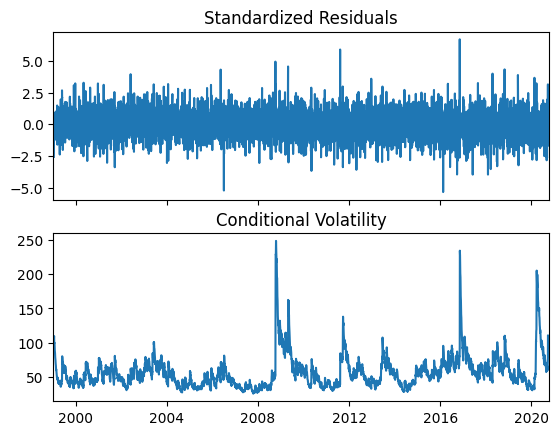

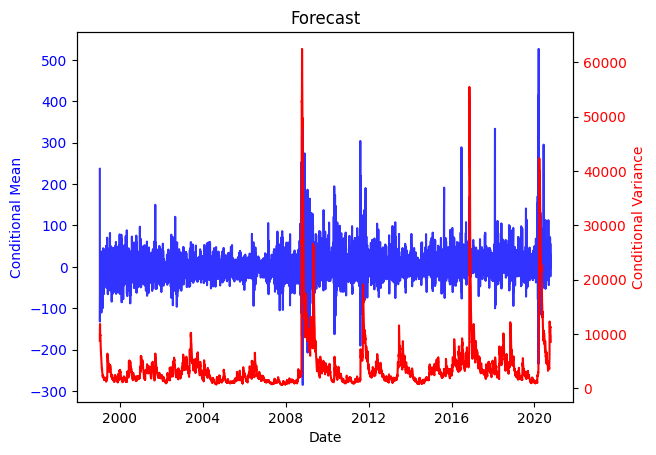

In [518]:
# Variable Declarations
start_date = '2020-01-01'
exog_fcast_d = {var: df_tranformed.loc[:, [var]].values for var in exog_l}
horizon=1
fmethod='analytic' #'simulations', 'bootstrap'


for depvar in ['FX/Vix', 'FX log returns']:
    exog_l = models_l['Baseline']
    start_date = '2020-01-01'

    exog_fcast_d = {var: df_tranformed.loc[:, [var]].values for var in exog_l}
    horizon=1
    fmethod='analytic' #'simulations', 'bootstrap'

    params = {}
    pvalues = {}
    for i in range(3):
        if i==0:
            fv = ConstantVariance()
        else:
            # Create the fixed variance
            cond_var = (vol_res.conditional_volatility**2.0)
            variance = pd.Series(np.ones(len(df_tranformed))*cond_var.mean(), index=df_tranformed.index)
            variance.loc[cond_var.index] = cond_var
            variance = variance.fillna(variance.mean())    
            fv = FixedVariance(variance, unit_scale=True)

        # Re-train the main model with the previous Conditional Variance
        mean_mod = ARX(df_tranformed[depvar], 
                  x = df_tranformed[exog_l], 
                  lags=[1, 8],
                  volatility=fv)
        mean_res = mean_mod.fit(disp="off")
        mean_res.params

        vol_mod = ZeroMean(mean_res.resid.dropna(),
                           volatility=GARCH(p=1, o=1, q=1),
                           distribution = SkewStudent()
                          )
        vol_res = vol_mod.fit(disp="off")


        params[f"iteration_{i}"] = pd.concat([
            pd.concat([mean_res.params, vol_res.params]),
            pd.concat([mean_res.pvalues, vol_res.pvalues])
        ], axis=1, keys=['params', 'pvalues'])

    params_df = pd.concat(params.values(), keys = params.keys(), axis=1)
    display( np.round(params_df, 3))
    print(mean_res.summary())
    print(vol_res.summary())
    mean_res.plot(); plt.show()
    
    #Forecast
    forecast_vars = pd.concat([df_tranformed[depvar].shift(lag).rename(f'FX l...rns[{lag}]') for lag in [1, 8]],axis=1)
    forecast_vars['Const'] = 1
    forecast_vars = pd.concat([forecast_vars, df_tranformed[exog_l]], axis=1).dropna()
    cond_mean = (mean_res.params*forecast_vars).sum(axis=1)
    
    cond_vol = vol_res.conditional_volatility
    cond_var = cond_vol**2
    
    res_forecast = pd.concat([
        cond_mean,
        cond_vol,
        cond_var
    ], axis = 1, keys = ['Mean', 'Volatility', 'Variance'])
    
    plot_forecast(res_forecast)

In [447]:
len(exog_fcast_d.keys())

8

In [ ]:
print(f'mean: {df_tranformed['FX/Vix'].mean()}', 
      f'Vol: {df_tranformed['FX/Vix'].std()}', 
      f'mean: {df_tranformed['FX/Vix'].mean()}', 
     )

In [443]:
# Variable Declarations
depvar= 'FX/Vix'
exog_l =[
 'Bid ask abs',
 'Min max abs',
 'Forward points first difference',
 'Interbank rate vs Libor',
 'VIX first diff',
 'EURUSD log returns',
 'Oil prices log returns',
 'FX intervention dummy lag'
]
start_date = '2020-01-01'

exog_fcast_d = {var: df_tranformed.loc[:, [var]].values for var in exog_l}
horizon=1
fmethod='analytic' #'simulations', 'bootstrap'

# Model
model = ARX(y = df_tranformed[depvar], 
            x = df_tranformed[exog_l], 
            lags = [1,8],
            volatility = EWMAVariance(),
            distribution = SkewStudent()
           )
# Option 1: In sample forecasting 
res = model.fit(disp='off')
print(res.summary())

#Forecast
forecasts = res.forecast(horizon=horizon,
                         x= exog_fcast_d, 
                         start = start_date,
                         method= fmethod,
                         reindex=True)

res_forecast_opt1 = pd.concat([
    forecasts.mean.dropna().squeeze(),
    forecasts.variance.dropna().squeeze(),
    forecasts.residual_variance.dropna().squeeze()
], axis = 1, keys = ['Mean', 'Variance', 'Residual Variance'])

                          AR-X - EWMA/RiskMetrics Model Results                          
Dep. Variable:                            FX/Vix   R-squared:                       0.147
Mean Model:                                 AR-X   Adj. R-squared:                  0.145
Vol Model:                      EWMA/RiskMetrics   Log-Likelihood:               -14043.7
Distribution:      Standardized Skew Student's t   AIC:                           28113.4
Method:                       Maximum Likelihood   BIC:                           28199.8
                                                   No. Observations:                 5675
Date:                           Thu, Apr 06 2023   Df Residuals:                     5664
Time:                                   13:24:00   Df Model:                           11
                                             Mean Model                                             
                                       coef    std err          t      P>|t|        95.0%

In [ ]:
# Function to calculate RMSE
def rmse_cal(resid_df):
    resid_df = resid_df.dropna()
    return(math.sqrt(np.nansum(resid_df*resid_df)/len(resid_df)))

# Function to calculate MAE
def mae_cal(resid_df):
    resid_df = resid_df.dropna()
    return(np.nansum(abs(resid_df))/len(resid_df))

def plot_forecast(res_forecast):
    # Create the first plot with blue axis
    fig, ax1 = plt.subplots()
    ax1.plot(res_forecast.Mean, color='b', alpha=0.8)
    ax1.set_ylabel('Conditional Mean', color='b')
    ax1.tick_params(axis='y', labelcolor='b')
    ax1.set_xlabel('Date')
    ax1.set_title('Forecast')

    # Create the second plot with red axis
    ax2 = ax1.twinx()
    ax2.plot(res_forecast.Variance, color='r')
    ax2.set_ylabel('Conditional Variance', color='r')
    ax2.tick_params(axis='y', labelcolor='r')

    plt.show()

In [374]:
# Variable Declarations
depvar= 'FX log returns'
exog_l = ['Bid ask abs',] + models_l['Baseline']
start_date = '2020-01-01'

exog_fcast_d = {var: df_tranformed.loc[:, [var]].values for var in exog_l}
horizon=1
fmethod='analytic' #'simulations', 'bootstrap'

                               AR-X - EGARCH Model Results                               
Dep. Variable:                    FX log returns   R-squared:                       0.275
Mean Model:                                 AR-X   Adj. R-squared:                  0.273
Vol Model:                                EGARCH   Log-Likelihood:               -30440.1
Distribution:      Standardized Skew Student's t   AIC:                           60914.3
Method:                       Maximum Likelihood   BIC:                           61027.2
                                                   No. Observations:                 5675
Date:                           Thu, Apr 06 2023   Df Residuals:                     5664
Time:                                   10:46:42   Df Model:                           11
                                             Mean Model                                            
                                      coef    std err          t      P>|t|        95.0% C

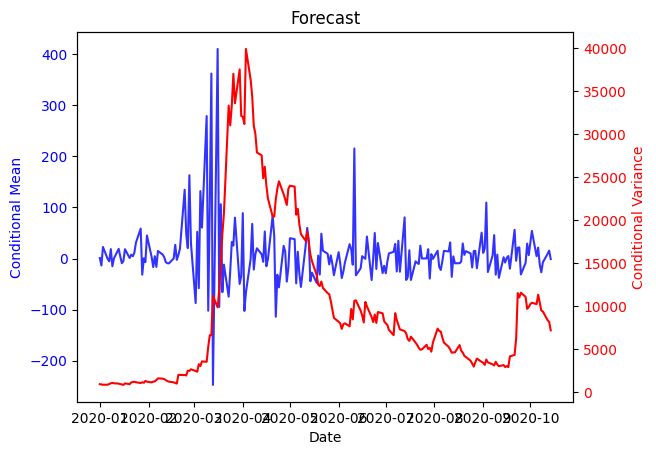

In [376]:
# Option 1: In sample forecasting 
# Model
model = ARX(y = df_tranformed[depvar], 
            x = df_tranformed[exog_l], 
            lags = [1, 8],
            volatility = EGARCH(1,1,1) ,
            distribution = SkewStudent()
           )

res = model.fit(disp='off')
print(res.summary())

#Forecast
forecasts = res.forecast(horizon=horizon,
                         x= exog_fcast_d, 
                         start = start_date,
                         method= fmethod,
                         reindex=True)

res_forecast_opt1 = pd.concat([
    forecasts.mean.dropna().squeeze(),
    forecasts.variance.dropna().squeeze(),
    forecasts.residual_variance.dropna().squeeze()
], axis = 1, keys = ['Mean', 'Variance', 'Residual Variance'])

plot_forecast(res_forecast_opt1)

                               AR-X - EGARCH Model Results                               
Dep. Variable:                    FX log returns   R-squared:                       0.282
Mean Model:                                 AR-X   Adj. R-squared:                  0.280
Vol Model:                                EGARCH   Log-Likelihood:               -29265.3
Distribution:      Standardized Skew Student's t   AIC:                           58560.5
Method:                       Maximum Likelihood   BIC:                           58659.7
                                                   No. Observations:                 5476
Date:                           Thu, Apr 06 2023   Df Residuals:                     5467
Time:                                   09:26:01   Df Model:                            9
                                             Mean Model                                            
                                      coef    std err          t      P>|t|        95.0% C

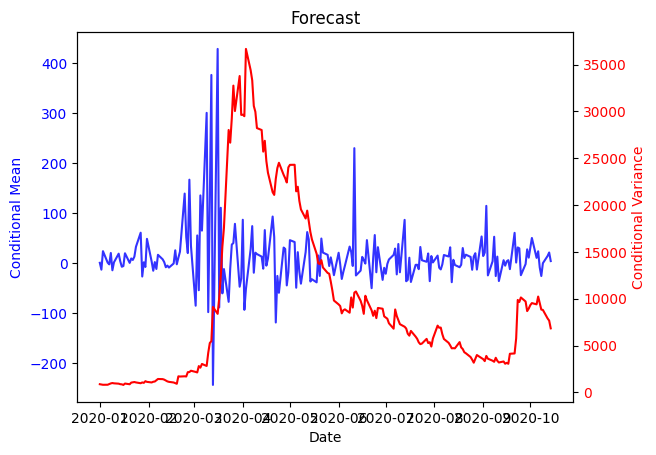

In [282]:
# Option 2: Out of sample forecasting - Fixed Window 
res = model.fit(disp='off', last_obs =start_date)
print(res.summary())

#Forecast
forecasts = res.forecast(horizon=horizon,
                         x= exog_fcast_d, 
                         method= fmethod,
                         start = start_date,
                         reindex=False)

res_forecast_opt2 = pd.concat([
    forecasts.mean.dropna().squeeze(),
    forecasts.variance.dropna().squeeze(),
    forecasts.residual_variance.dropna().squeeze()
], axis = 1, keys = ['Mean', 'Variance', 'Residual Variance'])
plot_forecast(res_forecast_opt2)

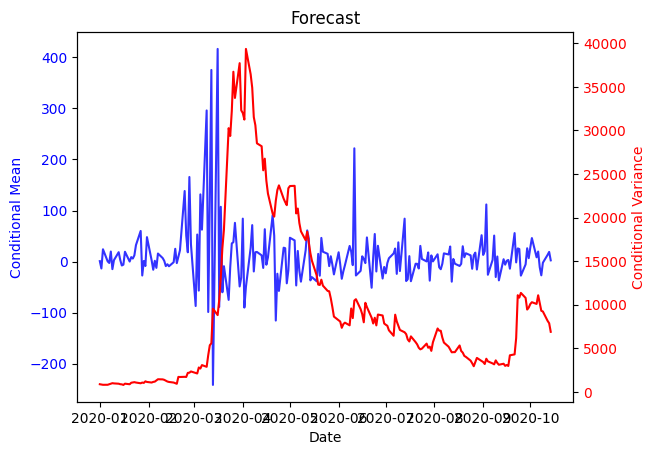

In [266]:
# Option 3: Out of sample forecasting - Expanding Window 
forecasts = {}
for date in df_tranformed.loc[df_tranformed.index>=start_date].index:
    res = model.fit(last_obs=date, disp="off")
    temp = res.forecast(horizon=horizon,
                             x= exog_fcast_d, 
                             method= fmethod,
                             reindex=False)
    forecasts[date] = {'Mean': temp.mean.loc[date].squeeze(), 
                     'Variance': temp.variance.loc[date].squeeze(), 
                     'Residual Variance': temp.residual_variance.loc[date].squeeze(), 
            }
res_forecast_opt3 = pd.DataFrame(forecasts).T
plot_forecast(res_forecast_opt3)

In [268]:
mean_forecasts = pd.concat([res_forecast_opt1.Mean,
            res_forecast_opt2.Mean,
            res_forecast_opt3.Mean
          ], axis=1, keys=['Insample', 'Out-of-sample FW', 'Out-of-sample EW'])

variance_forecasts = pd.concat([
    res_forecast_opt1.Variance,
            res_forecast_opt2.Variance,
            res_forecast_opt3.Variance
          ], axis=1, keys=['Insample', 'Out-of-sample FW', 'Out-of-sample EW'])


<Axes: >

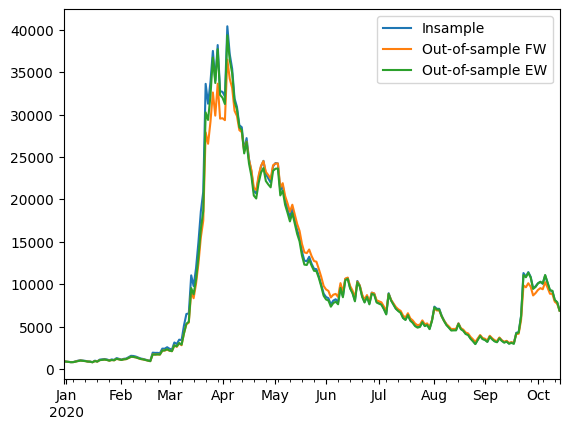

In [270]:
variance_forecasts.plot()

<Axes: >

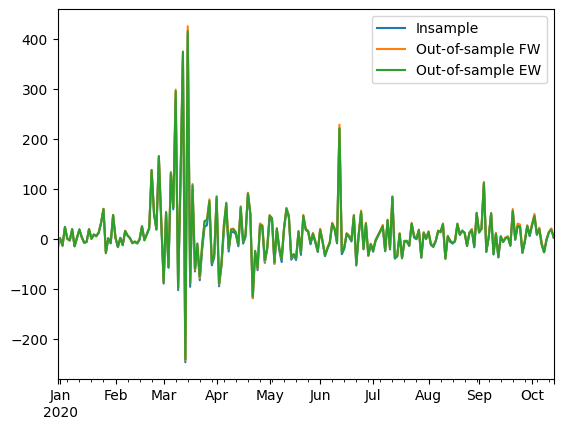

In [269]:
mean_forecasts.plot()

In [286]:
res.params

Const                              -2.408677
FX l...rns[1]                      -0.079918
Min max abs                        34.898941
Forward points first difference    18.415945
Interbank rate vs Libor            34.915268
EURUSD log returns                 -0.152643
VIX first diff                     15.488323
Oil prices log returns             -0.022365
FX intervention dummy lag           1.459202
omega                               0.092217
alpha[1]                            0.135406
gamma[1]                            0.043741
beta[1]                             0.988780
eta                                 8.464264
lambda                              0.058803
Name: params, dtype: float64

In [304]:
cond_mean = forecasts.mean
cond_var = forecasts.variance
q = model.distribution.ppf([0.99, 0.95, 0.5, 0.05, 0.01], res.params[-2:])
Quantiles = cond_mean.values + np.sqrt(cond_var).values * q[None, :]
Quantiles = pd.DataFrame(Quantiles, columns=['99%', '95%',  "50%", "5%", "1%"], index=cond_var.index)

In [305]:
Quantiles

,99%,95%,50%,5%,1%
date,,,,,
2020-01-01,76.582299,48.892008,-0.654900,-46.572545,-71.210916
2020-01-02,61.619885,34.388719,-14.336665,-59.492964,-83.722812
2020-01-03,97.173855,70.449267,22.630312,-21.685952,-45.465057
2020-01-06,74.447956,47.637378,-0.335440,-44.794296,-68.649913
2020-01-07,73.899672,46.051501,-3.777908,-49.957361,-74.736211
...,...,...,...,...,...
2020-10-08,216.822192,128.840148,-28.588256,-174.485185,-252.770178
2020-10-09,241.946281,154.130996,-2.999023,-148.619424,-226.756037
2020-10-12,243.551789,160.391453,11.590647,-126.310648,-200.305363


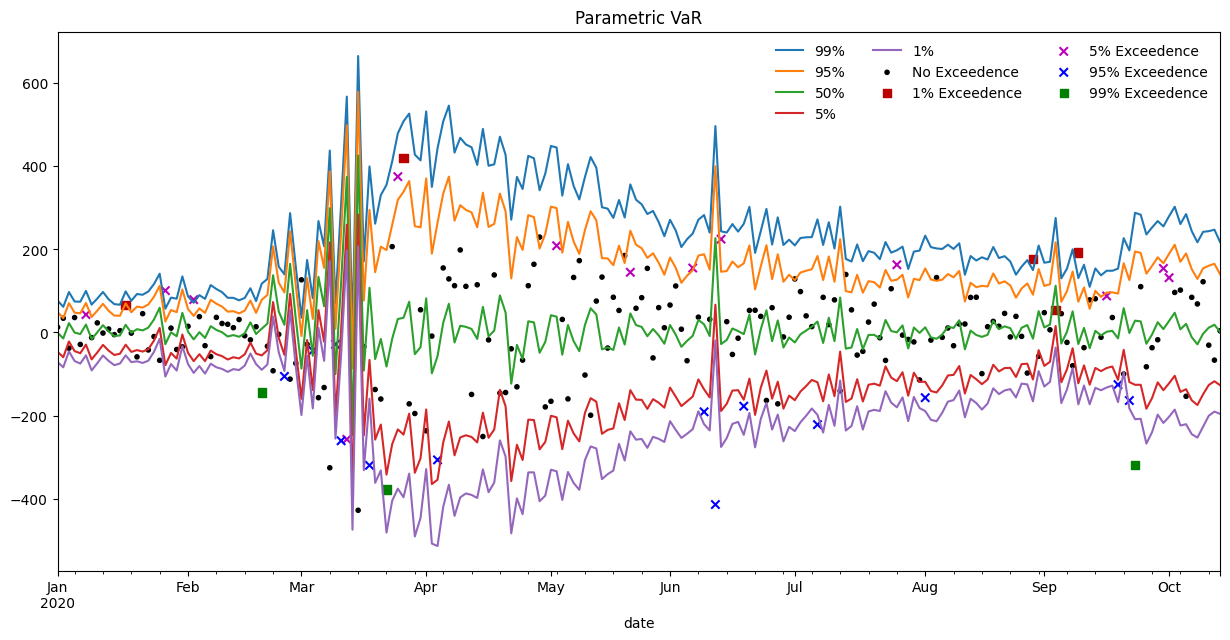

In [320]:
ax = Quantiles.plot(legend=False, figsize=(15,7))
xl = ax.set_xlim(Quantiles.index[0], Quantiles.index[-1])
rets = df_tranformed.loc[df_tranformed.index>=start_date, depvar]

c = []
for date in Quantiles.index:
    if (Quantiles.loc[date, "1%"] < rets[date]) & (rets[date]< Quantiles.loc[date, "5%"]):
        c.append("#BB00BB")
    elif rets[date] < Quantiles.loc[date, "1%"]:
        c.append("#BB0000")
    elif (rets[date] < Quantiles.loc[date, "99%"]) & (rets[date] > Quantiles.loc[date, "95%"]):
        c.append("blue")
    elif rets[date] > Quantiles.loc[date, "99%"]:
        c.append("green")
    else:
        c.append("#000000")
        
c = np.array(c, dtype="object")
labels = {
    "#BB0000": "1% Exceedence",
    "#BB00BB": "5% Exceedence",
    "#000000": "No Exceedence",
    "blue": "95% Exceedence",
    "green": "99% Exceedence",
}
markers = {"#BB0000": "s", "#BB00BB": "x", "#000000": ".", "blue":"x", "green": "s"}
for color in np.unique(c):
    sel = c == color
    ax.scatter(
        rets.index[sel],
        -rets.loc[sel],
        marker=markers[color],
        c=c[sel],
        label=labels[color],
    )
ax.set_title("Parametric VaR")
leg = ax.legend(frameon=False, ncol=3)

In [149]:
model = ARX(y = df_tranformed['FX log returns'], 
            x = df_tranformed[models_l['Baseline']], 
            lags = [1, 8],
           )
model.volatility = EGARCH(1,1,1)
model.distribution = SkewStudent()
res = model.fit(disp='off')
print(res.summary())

                               AR-X - EGARCH Model Results                               
Dep. Variable:                    FX log returns   R-squared:                       0.275
Mean Model:                                 AR-X   Adj. R-squared:                  0.273
Vol Model:                                EGARCH   Log-Likelihood:               -30440.1
Distribution:      Standardized Skew Student's t   AIC:                           60914.3
Method:                       Maximum Likelihood   BIC:                           61027.2
                                                   No. Observations:                 5675
Date:                           Wed, Apr 05 2023   Df Residuals:                     5664
Time:                                   13:13:58   Df Model:                           11
                                             Mean Model                                            
                                      coef    std err          t      P>|t|        95.0% C

In [193]:
# Generate Error sample
sample_size = 1000
err_sampler = model.distribution.simulate(res.params[['eta', 'lambda']])
err_sample = err_sampler(sample_size)

# Generalte the sample
sample = model.cond_mean.values +(np.sqrt(model.cond_var).values* err_sample)
sample

AttributeError: 'ARX' object has no attribute 'cond_mean'

In [ ]:
# PAY ATTENTION THAT THE DISTRIBUTIONS ARE STANDARDIZED
# TO RECOVER THE SERIES, NEED TO REINFLATE WITH MEAN AND VAR

# Summarize the conditional quantiles in a dataframe
# xbar = (x-mu)/std => x = mu + xbar*std
# mean + sqrt(cond_var)*the quantiles of the errors terms
for var in self.cond_quant_labels_l: self.dfor[var] = np.nan
self.dfor[self.cond_quant_labels_l] = (self.dfor[['cond_mean']].values
                                    + (self.dfor[['cond_vol']].values
                                          * err_cond_quant[None, :]))

# Sampling the error terms and deriving the values for y in a dataframe
err_sample = err_sampler(self.sample_size)
self.sample = self.cond_mean.values +(np.sqrt(self.cond_var).values
                                          * err_sample)
self.sample = pd.DataFrame(self.sample,
                           columns=range(self.sample_size),
                           index=self.dfor.index)

In [118]:
from arch.univariate import ARX, GARCH, ZeroMean, arch_model

burn = 250

x_mod = ARX(None, lags=1)
x0 = x_mod.simulate([1, 0.8, 1], nobs=1000 + burn).data
x1 = x_mod.simulate([2.5, 0.5, 1], nobs=1000 + burn).data

resid_mod = ZeroMean(volatility=GARCH())
resids = resid_mod.simulate([0.1, 0.1, 0.8], nobs=1000 + burn).data

phi1 = 0.7
phi0 = 3
y = 10 + resids.copy()
for i in range(1, y.shape[0]):
    y[i] = phi0 + phi1 * y[i - 1] + 2 * x0[i] - 2 * x1[i] + resids[i]

x0 = x0.iloc[-1000:]
x1 = x1.iloc[-1000:]
y = y.iloc[-1000:]
y.index = x0.index = x1.index = np.arange(1000)

In [124]:
exog = pd.DataFrame({"x0": x0, "x1": x1})
mod = arch_model(y, x=exog, mean="ARX", lags=1)
res = mod.fit(disp="off")
print(res.summary())

                          AR-X - GARCH Model Results                          
Dep. Variable:                   data   R-squared:                       0.988
Mean Model:                      AR-X   Adj. R-squared:                  0.988
Vol Model:                      GARCH   Log-Likelihood:               -1334.87
Distribution:                  Normal   AIC:                           2683.74
Method:            Maximum Likelihood   BIC:                           2718.09
                                        No. Observations:                  999
Date:                Wed, Apr 05 2023   Df Residuals:                      995
Time:                        13:05:49   Df Model:                            4
                               Mean Model                               
                 coef    std err          t      P>|t|  95.0% Conf. Int.
------------------------------------------------------------------------
Const          2.9560      0.151     19.595  1.722e-85 [  2.660,  3.25

In [123]:
x0_oos = np.empty((1000, 10))
x1_oos = np.empty((1000, 10))
for i in range(10):
    if i == 0:
        last = x0
    else:
        last = x0_oos[:, i - 1]
    x0_oos[:, i] = 1 + 0.8 * last
    if i == 0:
        last = x1
    else:
        last = x1_oos[:, i - 1]
    x1_oos[:, i] = 2.5 + 0.5 * last

x1_oos

array([[5.78862643, 5.39431321, 5.19715661, ..., 5.00616114, 5.00308057,
        5.00154029],
       [6.04642997, 5.52321499, 5.26160749, ..., 5.00817523, 5.00408762,
        5.00204381],
       [5.09786167, 5.04893084, 5.02446542, ..., 5.00076454, 5.00038227,
        5.00019114],
       ...,
       [5.45748626, 5.22874313, 5.11437156, ..., 5.00357411, 5.00178706,
        5.00089353],
       [5.39280797, 5.19640399, 5.09820199, ..., 5.00306881, 5.00153441,
        5.0007672 ],
       [5.99404126, 5.49702063, 5.24851031, ..., 5.00776595, 5.00388297,
        5.00194149]])

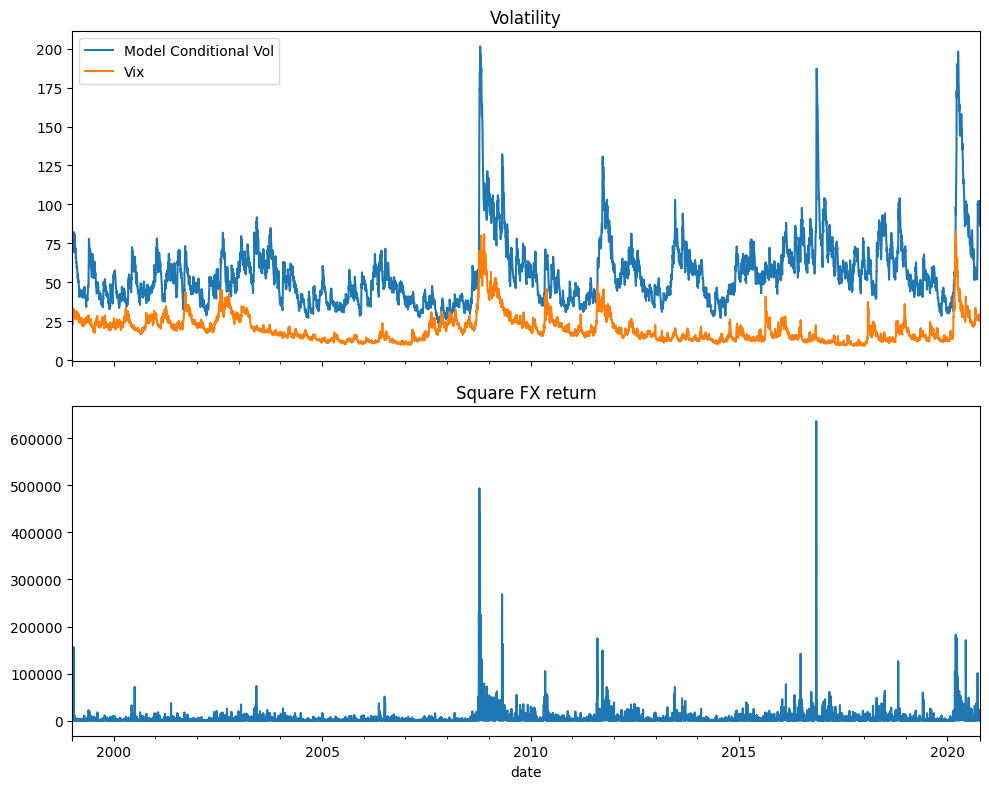

In [79]:
f, axes = plt.subplots(2, 1,figsize=(10,8), sharex=True)
res.conditional_volatility.plot(ax= axes[0], title = 'Volatility', label='Model Conditional Vol')
df['vix'].plot(ax= axes[0], label = 'Vix')
axes[0].legend(loc='best')
(df_tranformed['FX log returns']**2).plot(ax= axes[1], title = 'Square FX return')
plt.tight_layout()
plt.show()

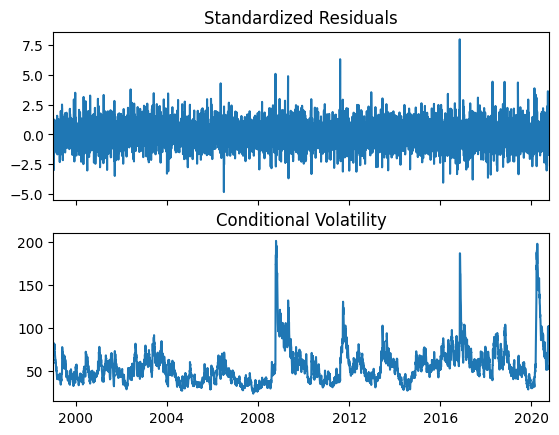

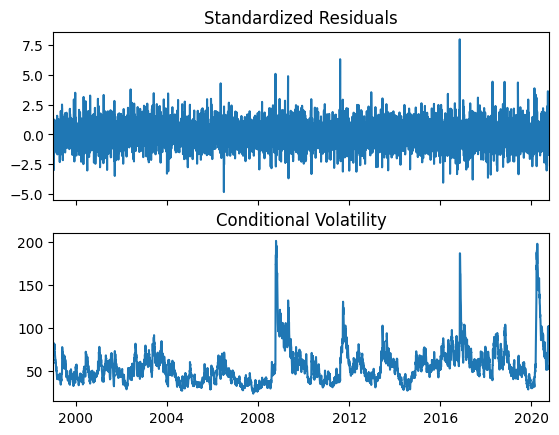

In [81]:
res.plot()

In [80]:
model.forecast?

Signature:
model.forecast(
    params: 'ArrayLike1D',
    horizon: 'int' = 1,
    start: 'Union[None, int, DateLike]' = None,
    align: "Literal['origin', 'target']" = 'origin',
    method: 'ForecastingMethod' = 'analytic',
    simulations: 'int' = 1000,
    rng: 'Optional[Callable[[Union[int, Tuple[int, ...]]], Float64Array]]' = None,
    random_state: 'Optional[np.random.RandomState]' = None,
    *,
    reindex: 'Optional[bool]' = None,
    x: 'Union[None, Dict[Label, ArrayLike], ArrayLike]' = None,
) -> 'ARCHModelForecast'
Docstring:
Construct forecasts from estimated model

Parameters
----------
params : {ndarray, Series}
    Parameters required to forecast. Must be identical in
    shape to the parameters computed by fitting the model.
horizon : int, optional
   Number of steps to forecast
start : {int, datetime, Timestamp, str}, optional
    An integer, datetime or str indicating the first observation to
    produce the forecast for.  Datetimes can only be used with pandas
    i